In [1]:
# 1. Utwórz baseline dla zbioru danych diabetes.
# 2. Utwórz LinearRegression dla ww zbioru.
#     Podziel dane używając train_test_split
#     Oblicz R^2 oraz RMSE
# 3. Sprawdź wyniki po zastosowaniu regularyzacji Ridge i Lasso dla standardowych hyperparametrów.
# 4. Sprawdź wpływ parametru alpha na Ridge i Lasso (pamiętaj, żeby zmienić alpha `ridge.alpha = alpha`)
# 5. Wykorzystaj RidgeCV oraz LassoCV do danych z pkt. 4
# 6. Porównaj wyniki (metryki)

# Rozwiązanie prześlij jako printscreen.
# Nazwa pliku (bez polskich znaków):
# Nazwisko_Imie_02_niestacj.jpg

In [155]:
from sklearn.datasets import load_diabetes
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge, Lasso
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
import numpy as np
import pandas as pd

In [156]:
# load and return the diabetes dataset (regression).
diabetes = load_diabetes()
dir(diabetes)

['DESCR',
 'data',
 'data_filename',
 'feature_names',
 'frame',
 'target',
 'target_filename']

In [157]:
X, y = diabetes.data, diabetes.target

    strategy{“mean”, “median”, “quantile”, “constant”}, default=”mean”

    Strategy to use to generate predictions.
        “mean”: always predicts the mean of the training set
        “median”: always predicts the median of the training set
        “quantile”: always predicts a specified quantile of the training set, provided with the quantile parameter.
        “constant”: always predicts a constant value that is provided by the user.

# 1

In [158]:
# baseline dummy regressor
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X, y)
preds = dummy_regr.predict(X)

y_true array-like of shape (n_samples,) or (n_samples, n_outputs)

    Ground truth (correct) target values.
y_pred array-like of shape (n_samples,) or (n_samples, n_outputs)

    Estimated target values.


In [159]:
# root mean squared error -> squared=Fales means root
print("RMSE for dummy regression", mean_squared_error(y, preds, squared=False))
# r^2 score
print("r2 score for dummy regression", r2_score(y, preds))

RMSE for dummy regression 77.00574586945044
r2 score for dummy regression 0.0


# 2

In [160]:
# train_test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linear%20regression#sklearn.linear_model.LinearRegression

In [161]:
# standar scaling
scaler = StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [162]:
# LinearRegression
model = LinearRegression()
model.fit(X_train_std, y_train)
preds = model.predict(X_test_std)

In [163]:
# root mean squared error -> squared=Fales means root
print("RMSE for linear regression", mean_squared_error(y_test, preds, squared=False))
# r^2 score
print("r2 score for linear regression", r2_score(y_test, preds))

RMSE for linear regression 56.06749124913092
r2 score for linear regression 0.4033025232246106


### summary:

    * RMSE for dummy regression 77.00574586945044
    * R2 score for dummy regression 0.0

    * RMSE for linear regression 56.06749124913091
    * R2 score for linear regression 0.4033025232246107

# 3

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [164]:
clf = Ridge()
clf.fit(X_train_std, y_train)
preds = clf.predict(X_test_std)

In [165]:
# root mean squared error -> squared=Fales means root
print("RMSE for ridge", mean_squared_error(y_test, preds, squared=False))
# r^2 score
print("r2 score for ridge", r2_score(y_test, preds))

RMSE for ridge 56.094487836879445
r2 score for ridge 0.4027277632830567


https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

In [166]:
# lasso
clf = Lasso()
clf.fit(X_train_std, y_train)
preds = clf.predict(X_test_std)

In [167]:
# root mean squared error -> squared=Fales means root
print("RMSE for lasso", mean_squared_error(y_test, preds, squared=False))
# r^2 score
print("r2 score for lasoo", r2_score(y_test, preds))

RMSE for lasso 56.19882881697803
r2 score for lasoo 0.40050373260020367


### summary:

    * RMSE for ridge 56.094487836879445
    * R2 score for ridge 0.4027277632830567
    * RMSE for lasso 56.19882881697803
    * R2 score for lasso 0.40050373260020367

# 4

In [168]:
alpha = list(range(1, 101, 1))
score_list_ridge = []
score_list_lasso = []

In [169]:
for i in alpha:
    ridge = Ridge(normalize=False)
    ridge.set_params(alpha = i)
    ridge.fit(X_train_std, y_train)
    
    preds = ridge.predict(X_test_std)
    score = r2_score(y_test, preds)
    
    score_list_ridge.append(score)

In [170]:
for i in alpha:
    lasso = Lasso(normalize=False)
    lasso.set_params(alpha = i)
    lasso.fit(X_train_std, y_train)
    
    preds = lasso.predict(X_test_std)
    score = r2_score(y_test, preds)
    
    score_list_lasso.append(score)

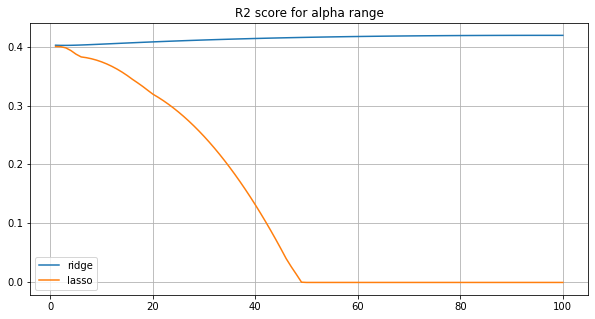

In [171]:
plt.figure(figsize=(10,5))
sns.lineplot(x=alpha, y=score_list_ridge, label="ridge")
sns.lineplot(x=alpha, y=score_list_lasso, label="lasso")
plt.title("R2 score for alpha range")
plt.legend()
plt.grid();

# 5

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html

In [172]:
alpha = (0.001, 0.01, 0.1, 1.0, 10.0, 100, 1000)
cv = list(range(2, 42, 2))
score_list_ridge = []
score_list_lasso = []

In [173]:
for i in cv:
    ridge = RidgeCV(normalize=False, alphas = alpha, cv=i)
    ridge.fit(X_train_std, y_train)
    preds = ridge.predict(X_test_std)
    
    score = r2_score(y_test, preds)
    score_list_ridge.append(score)
print(score)

0.4045745545779539


In [174]:
for i in cv:
    lasso = LassoCV(normalize=False, alphas = alpha, cv=i)
    lasso.fit(X_train_std, y_train)
    preds = lasso.predict(X_test_std)
    
    score = r2_score(y_test, preds)
    score_list_lasso.append(score)
print(score)

0.40050373260020367


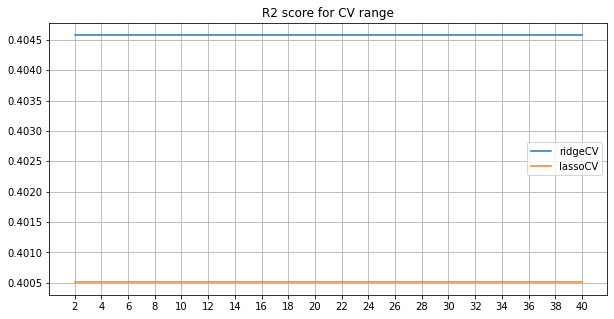

In [175]:
plt.figure(figsize=(10,5))
sns.lineplot(x=cv, y=score_list_ridge, label="ridgeCV")
sns.lineplot(x=cv, y=score_list_lasso, label="lassoCV")
plt.xticks(range(2, 42, 2))
plt.title("R2 score for CV range")
plt.legend()
plt.grid();

# 6

In [176]:
r2_score_dict = {
    "dummy regression": 0.0,
    "linear regression": 0.4033025232246107,
    "ridge": 0.4027277632830567,
    "lasoo": 0.40050373260020367,
    "ridgeCV": 0.4045745545779539,
    "lassoCV": 0.40050373260020367
}

In [177]:
r2_df = pd.DataFrame.from_dict(r2_score_dict, orient='index')
r2_df

,0
dummy regression,0.000000
linear regression,0.403303
ridge,0.402728
lasoo,0.400504
ridgeCV,0.404575
lassoCV,0.400504


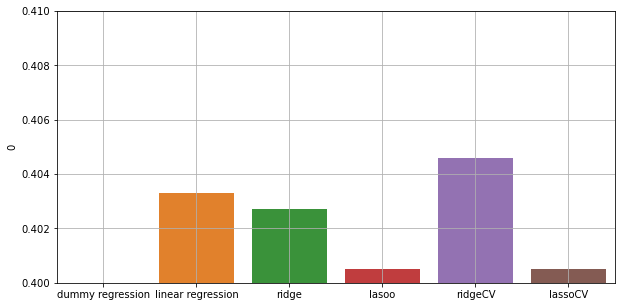

In [178]:
plt.figure(figsize=(10,5))
sns.barplot(x=r2_df.index, y=r2_df[0])
plt.ylim(0.40, 0.41)
plt.grid()